# Decision Trees

## Setup

In [1]:
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

## Training and Visualizing a Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )


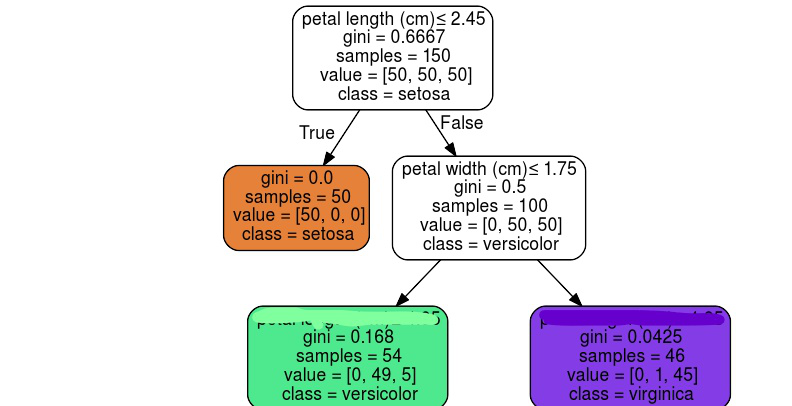

In [13]:
from PIL import Image
Image.open('iris.jpg')


Suppose, we want to classifiy a flower then we start at root node(depth 0): this node asks whether the flower's petal length is smaller than 2.45cm.<br>__1st case__: If it is then we move down to the root's left child node(depth 1). In this case, it is a leaf node (i.e no child node) so simply the flower is _iris setosa_ (depth 0).<br>__2nd case__: If not then it move down to the root's right child node (depth 1) which is not a leaf node so asks another ques: if the peral width is smaller than 1.75 cm <br> __1st case__: If it is then, flower is _iris versicolor_ (depth 2). <br> __2nd case__: If not then it is _iris virginica_ (depth 1).

## Making Predictions


Saving figure decision_tree_decision_boundaries_plot


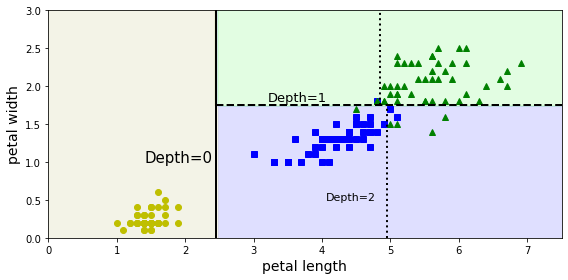

In [6]:
# out of book code

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_boundary(clf,X,y,axes=[0,7.5,0,3], iris=True,
                           legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)  
    x1,x2 = np.meshgrid(x1s,x2s)
    x_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#dadab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contourf(x1,x2,y_pred,alpha=0.8,cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:,0][y==0],X[:,1][y==0],"yo",label="iris-setosa")
        plt.plot(X[:,0][y==1],X[:,1][y==1],"bs",label="iris-versicolor")
        plt.plot(X[:,0][y==2],X[:,1][y==2],"g^",label="iris-verginica")
        plt.axis(axes)
        
    if iris:
        plt.xlabel("petal length",fontsize=14)
        plt.ylabel("petal width",fontsize=14)
    else:
        plt.xlabel(r"$x_1$",fontsize=18)
        plt.ylabel(r"$x_2$",fontsize=18,rotation=0)
    if legend:
        plt.legend(loc="lower right",fontsize=14)

plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf,X,y)
plt.plot([2.45,2.45],[0,3],"k-",linewidth=2)
plt.plot([2.45,7.5],[1.75,1.75],"k--",linewidth=2)
plt.plot([4.95,4.95],[0,1.75],"k:",linewidth=2)
plt.plot([4.85,4.85],[1.75,3],"k:",linewidth=2)
plt.text(1.40,1.0,"Depth=0",fontsize=15)
plt.text(3.2,1.80,"Depth=1",fontsize=13)
plt.text(4.05,0.5,"Depth=2",fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

Above, the thick vertical line represents the decision boundary of root node (depth 0): petal length=2.45cm. Since the lefthand area is pure (only Iris setosa), it cannot be split any further. However, the righthand area is impure, so the depth-1 right node splits it at petal width =1.75 cm (represented by the horizontal dashed line). Since max_depth was set to 2, the Decision Tree stops right there. If we set max_depth to 3, then the two depth-2 nodes would
each add another decision boundary (represented by the vertical dotted lines).

<div class="alert alert-block alert-danger"><b>Model Interpretation: White Box VS Black Box</b><br>
    <b>White box</b>: Decision trees, which are easy to interpret (Eg: flower classification)<br>
    <b>Black box</b>: Random forests or neural networks, they make great predictions, and we can easily check the calculations that they performed to make these predictions; nevertheless, it is usually hard to explain in simple terms why the predictions were made. (Eg: recognozing person in a photo) </div>

## Estimating Class Probabilities

In [15]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [16]:
tree_clf.predict([[5,1.5]])

array([1])

## CART Training Algorithm
Scikit-Learn uses the _Classification and Regression Tree (CART) algorithm_ to train Decision Trees (also called “growing” trees). The algorithm works by first splitting the training set into two subsets using a single feature k and a threshold $t_k$ (eg: "petal
length ≤ 2.45 cm"). It chooses k and $t_k$ by searching for the pair (k, $t_k$) that produces the purest subsets (weighted by their size).

<div class="alert alert-block alert-info"><b>Eqn 1: </b>CART cost function for classification<br> $J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$ <br> where,<br> $G_{left/right}$ measures impurity of left/right subset<br>$m_{left/right}$ measures instances in left/right subset</div>

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity.

## Gini Impurity or Entropy?
Both are impurity measures and leads to similar trees but 
- Gini impurity is slightly faster to compute
- Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

<div class="alert alert-block alert-info"><b>Eqn 2: </b>Gini impurity<br>$G_i = 1 - \sum\limits_{k=1}^{n} P_{i,k^2}$<br>where,<br>$P_{i,k}$ = ratio of class k instances among training instances in the $i^{th}$ node</div>

<div class="alert alert-block alert-warning"><b>Eqn 3: </b>Entropy<br>$H_i = - \sum\limits^{n}_{k=1} P_{i,k}log_2(P_{i,k})$<br>where,$P_{i,k}!=$0</div>

## Regularization Hyperparameters
Decision Trees make very few assumptions about the training data which most likely the results of overfitting it. Such model is called _nonparametric model_ (i.e no of parameters is not determined prior to training, so the model structure is free to stick closely to the data).<br> To avoid this overfitting the training data, we need to restrict the decision tree's freedom during training by restricting the maximum depth of the decision tree. <br> In Scikit-Learn, this is controlled by the max_depth hyperparameter (the default value is None, which means unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting.<br> Other eg of parameters that restrict the shape of decision tree: min_samples_split, min_samples_leaf, max_leaf_nodes, etc.

Saving figure min_samples_leaf_plot


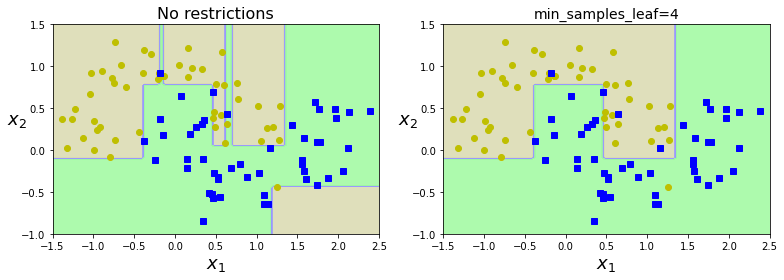

In [17]:
# out of book code

from sklearn.datasets import make_moons

xm,ym = make_moons(n_samples=100, noise=0.25, random_state=53)
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, 
                                        random_state=42)
deep_tree_clf1.fit(xm,ym)
deep_tree_clf2.fit(xm,ym)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, xm, ym, 
                       axes=[-1.5,2.5,-1,1.5], iris=False)
plt.title("No restrictions",fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, xm, ym, 
                       axes=[-1.5,2.5,-1,1.5], iris=False)
plt.title("min_samples_leaf={}".format(deep_tree_clf2.min_samples_leaf),
          fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

On the left, the decision tree is trained with default hyperparameters (i.e no restrictions) and on the right it’s trained with min_samples_leaf=4. It is quite obvious that the model on the left is overfitting, and the model on the right will probably generalize better.

# Regression

<div class="alert alert-block alert-info"><b>Eqn 14: </b>CART cost function for regression<br> $J(k,t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$ <br> </div>

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [21]:
# out of book code

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

Saving figure tree_regression_plot


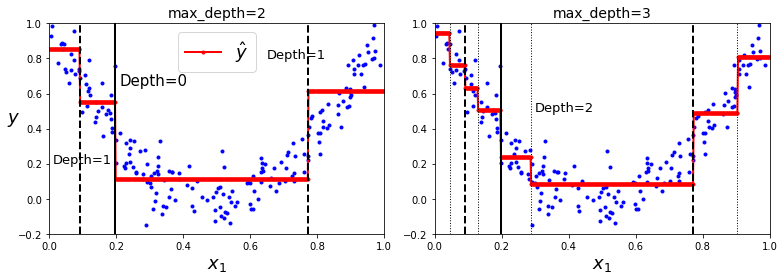

In [24]:
# out of book code

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [25]:
# out of book code

export_graphviz(
        tree_reg1,
        out_file=image_path("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Saving figure tree_regression_regularization_plot


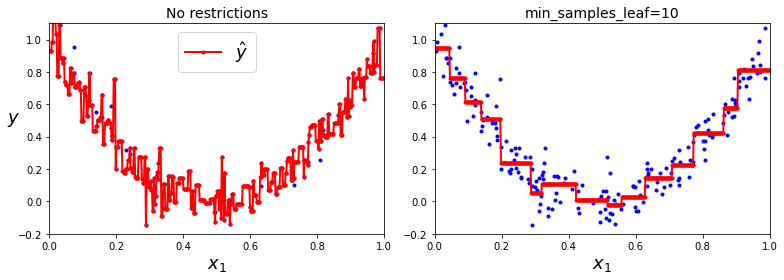

In [26]:
# out of book code

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

## Instability


Saving figure sensitivity_to_rotation_plot


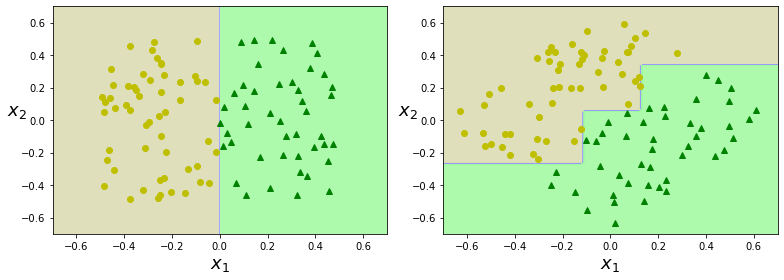

In [33]:
# out of book code

np.random.seed(6)
xs = np.random.rand(100,2) - 0.5
ys = (xs[:,0]>0).astype(np.float32)*2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle),np.cos(angle)]])
xsr = xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, xs, ys, 
                       axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, xsr, ys, 
                       axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()